In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
root_dir = Path.cwd().parent.parent
print(root_dir)

csv_save_name = 'femto_results_filtered.csv'

df = pd.read_csv(root_dir / 'models/final' / csv_save_name)
df.head()

/home/tim/Documents/weibull-knowledge-informed


,date_time,data_set,loss_func,rnd_seed_input,rnd_search_iter,rnd_search_iter_no,beta,eta,epochs,patience,...,weibull_loss,mse,rmse,rmsle,weibull_mse,weibull_rmse,weibull_rmsle,weibull_only_mse,weibull_only_rmse,weibull_only_rmsle
0,2021_04_06_21:34:43,femto,weibull_only_rmsle,5018061,3000,0,2.0,0.199977,2000,50,...,1,0,0,0,0,0,0,0,0,1
1,2021_04_06_18:22:55,femto,weibull_only_rmsle,1452705,3000,8,2.0,0.199977,2000,50,...,1,0,0,0,0,0,0,0,0,1
2,2021_04_06_17:27:06,femto,weibull_only_rmse,5373070,3000,7,2.0,0.199977,2000,50,...,1,0,0,0,0,0,0,0,1,0
3,2021_04_06_22:14:15,femto,weibull_only_rmse,1355603,3000,8,2.0,0.199977,2000,50,...,1,0,0,0,0,0,0,0,1,0
4,2021_04_06_22:05:45,femto,weibull_only_mse,2183353,3000,7,2.0,0.199977,2000,50,...,1,0,0,0,0,0,0,1,0,0


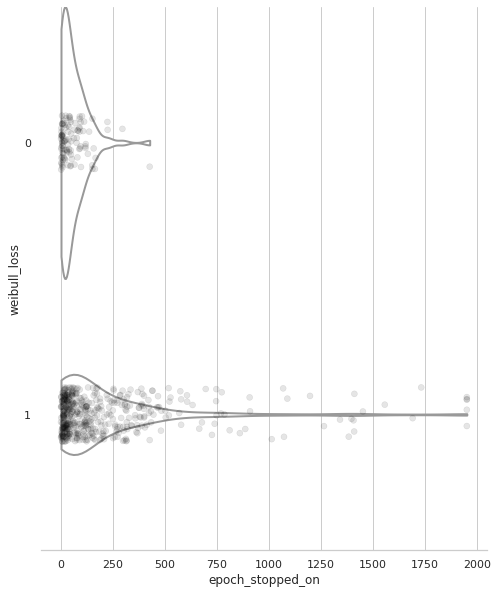

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10),)
sns.set(font_scale=1.0, style="whitegrid", font="DejaVu Sans")
ax = sns.violinplot(
        x="epoch_stopped_on",
        y='weibull_loss',
    data=df,
    scale='area',
        inner=None,
        linewidth=2,
        color="white",
        saturation=1,
        cut=0,
        orient="h",
        zorder=0,
        width=1,
    )

sns.despine(left=True)

    # strip plot
ax = sns.stripplot(
        x="epoch_stopped_on",
        y='weibull_loss',
#     hue='dob_yy',
    data=df,
        size=6,
        jitter=0.1,
        color="black",
        linewidth=0.5,
        marker="o",
        edgecolor=None,
        alpha=0.1,
#         palette=customPalette,
        zorder=4,
        orient="h",
    )